In [1]:
cd

/Users/GGV


In [2]:
cd Desktop/kaggle_Taxi_Trajectry_Prediction

/Users/GGV/Desktop/kaggle_Taxi_Trajectry_Prediction


In [3]:
import pandas as pd, numpy as np
from mpl_toolkits.basemap import Basemap
%matplotlib inline
%pylab inline
import seaborn 
import json
import folium
from folium import plugins
import zipfile
import matplotlib as mpl
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:

df = pd.read_csv('taxi_train.csv')
df_a = df[df['CALL_TYPE'] == 'A']
df_b = df[df['CALL_TYPE'] == 'B']
df_c = df[df['CALL_TYPE'] == 'C']


# visualize the GPS points for the first 100 data 

In [5]:
location = []
for index, row in df[:100].iterrows():
    location.append(row[8])
    
location

['[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8.623953,41.144373],[-8.62668,41.144778],[-8.627373,41.144697],[-8.630226,41.14521],[-8.632746,41.14692],[-8.631738,41.148225],[-8.629938,41.150385],[-8.62911,41.151213],[-8.629128,41.15124],[-8.628786,41.152203],[-8.628687,41.152374],[-8.628759,41.152518],[-8.630838,41.15268],[-8.632323,41.153022],[-8.631144,41.154489],[-8.630829,41.154507],[-8.630829,41.154516],[-8.630829,41.154498],[-8.630838,41.154489]]',
 '[[-8.639847,41.159826],[-8.640351,41.159871],[-8.642196,41.160114],[-8.644455,41.160492],[-8.646921,41.160951],[-8.649999,41.161491],[-8.653167,41.162031],[-8.656434,41.16258],[-8.660178,41.163192],[-8.663112,41.163687],[-8.666235,41.1642],[-8.669169,41.164704],[-8.670852,41.165136],[-8.670942,41.166576],[-8.66961,41.167962],[-8.668098,41.168988],[-8.66664,41.170005],[-8.665767,41.170635],[-8.66574,41.170671]]',
 '[[-8.612964,41.140359],[-8.613378,41.14035],[-8.614215,41.140278],[-8.61477

In [6]:
output = []
for k in range(len(location)):
    output += json.loads(location[k]) 


output

[[-8.618643, 41.141412],
 [-8.618499, 41.141376],
 [-8.620326, 41.14251],
 [-8.622153, 41.143815],
 [-8.623953, 41.144373],
 [-8.62668, 41.144778],
 [-8.627373, 41.144697],
 [-8.630226, 41.14521],
 [-8.632746, 41.14692],
 [-8.631738, 41.148225],
 [-8.629938, 41.150385],
 [-8.62911, 41.151213],
 [-8.629128, 41.15124],
 [-8.628786, 41.152203],
 [-8.628687, 41.152374],
 [-8.628759, 41.152518],
 [-8.630838, 41.15268],
 [-8.632323, 41.153022],
 [-8.631144, 41.154489],
 [-8.630829, 41.154507],
 [-8.630829, 41.154516],
 [-8.630829, 41.154498],
 [-8.630838, 41.154489],
 [-8.639847, 41.159826],
 [-8.640351, 41.159871],
 [-8.642196, 41.160114],
 [-8.644455, 41.160492],
 [-8.646921, 41.160951],
 [-8.649999, 41.161491],
 [-8.653167, 41.162031],
 [-8.656434, 41.16258],
 [-8.660178, 41.163192],
 [-8.663112, 41.163687],
 [-8.666235, 41.1642],
 [-8.669169, 41.164704],
 [-8.670852, 41.165136],
 [-8.670942, 41.166576],
 [-8.66961, 41.167962],
 [-8.668098, 41.168988],
 [-8.66664, 41.170005],
 [-8.665767,

In [7]:
map_1 = folium.Map(location=[41.155461 ,-8.620974], zoom_start=11)
marker_cluster = folium.MarkerCluster().add_to(map_1)
for k in output:  
    folium.Marker(location = [k[1],k[0]],popup= "marker_cluster").add_to(marker_cluster)
map_1

In [8]:
location_2 = []
for index, row in df[:1].iterrows():
    location_2.append(row[8])
output_2 = []
for k in range(len(location_2)):
    output_2 += json.loads(location_2[k]) 


output_2

[[-8.618643, 41.141412],
 [-8.618499, 41.141376],
 [-8.620326, 41.14251],
 [-8.622153, 41.143815],
 [-8.623953, 41.144373],
 [-8.62668, 41.144778],
 [-8.627373, 41.144697],
 [-8.630226, 41.14521],
 [-8.632746, 41.14692],
 [-8.631738, 41.148225],
 [-8.629938, 41.150385],
 [-8.62911, 41.151213],
 [-8.629128, 41.15124],
 [-8.628786, 41.152203],
 [-8.628687, 41.152374],
 [-8.628759, 41.152518],
 [-8.630838, 41.15268],
 [-8.632323, 41.153022],
 [-8.631144, 41.154489],
 [-8.630829, 41.154507],
 [-8.630829, 41.154516],
 [-8.630829, 41.154498],
 [-8.630838, 41.154489]]

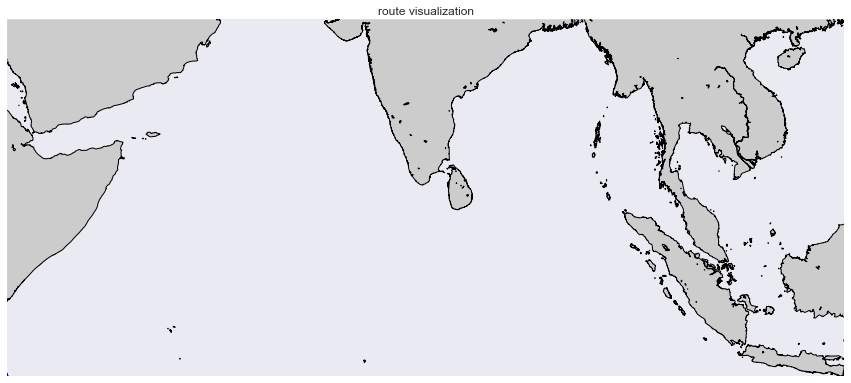

In [9]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_axes()

m = Basemap(llcrnrlon=41.155461 , llcrnrlat=-8.620974, urcrnrlon=114.44, urcrnrlat=22.58, resolution='h')

m.drawcoastlines()
m.fillcontinents()

for k in output_2:
    m.drawgreatcircle(k[1], k[0],k[1]- 2, k[0] + 4,  linewidth=2, color='b')
     
fig.axes[0].set_title("route visualization")
plt.show()

In [10]:
# Help functions 
def data_pre_process(df):
	df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], unit='s')
	df['year'] = df['TIMESTAMP'].map(lambda x: x.year)
	df['month'] = df['TIMESTAMP'].map(lambda x: x.month)
	df['day'] = df['TIMESTAMP'].map(lambda x: x.day)
	df['week'] = df['TIMESTAMP'].map(lambda x: x.week)
	df['hour'] = df['TIMESTAMP'].map(lambda x: x.hour)
	df['minute'] = df['TIMESTAMP'].map(lambda x: x.minute)
	df['second'] = df['TIMESTAMP'].map(lambda x: x.second)
	df['POLYLINE'] = df['POLYLINE'].map(json.loads)
	df['POLYLINE'] = df['POLYLINE'].map(np.array)
	df['KNOWN_DURATION'] = df['POLYLINE'].map(len) * 15
	return df




(-0.5, 1999.5, 1999.5, -0.5)

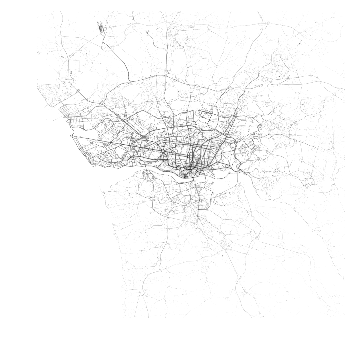

In [11]:
# heat map visualization 

# Longitude and latitude coordinates of Porto
lat_mid = 41.1496100
lon_mid = -8.6109900

# Load the data

df = pd.read_csv('taxi_train.csv', 
                 sep = ",",
                 chunksize = 1000,
                 iterator = True,
                 usecols = ['POLYLINE'],
                 converters={'POLYLINE': lambda x: json.loads(x)})

nrbins = 2000
hist = np.zeros((nrbins,nrbins))

for data in df:
  # Get just the longitude and latitude coordinates for each trip
  latlong = np.array([ coord for coords in data['POLYLINE'] for coord in coords if len(coords) > 0])

  # Compute the histogram with the longitude and latitude data as a source
  hist_new, _, _  = np.histogram2d(x = latlong[:,1], y = latlong[:,0], bins = nrbins, 
                                   range = [[lat_mid - 0.1, lat_mid + 0.1], [lon_mid - 0.1, lon_mid + 0.1]])

  # Add the new counts to the previous counts
  hist = hist + hist_new


# We consider the counts on a logarithmic scale
img = np.log(hist[::-1,:] + 1)

# Plot the counts
plt.figure()
ax = plt.subplot(1,1,1)
plt.imshow(img)
plt.axis('off')

#plt.savefig('trips_density.png')